In [1]:
import xlrd
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt
import xlwt
import operator
import copy
from functools import reduce
import sklearn.cluster as sc
import re
import bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook() #导入这个命令之后bokeh的绘画内容都在notebook上显示

# 不用科学计数
pd.set_option('display.float_format',lambda x : '%.2f' % x)


Loading BokehJS ...

In [2]:
# load data
excel_origin=pd.ExcelFile('ProblemCData.xlsx')# 原始数据
data_origin=pd.read_excel(excel_origin,'seseds')
data_origin

,MSN,StateCode,Year,Data
0,ABICB,AZ,1960,0.00
1,ABICB,AZ,1961,0.00
2,ABICB,AZ,1962,0.00
3,ABICB,AZ,1963,0.00
4,ABICB,AZ,1964,0.00
...,...,...,...,...
105739,WYTCB,TX,2005,42367.85
105740,WYTCB,TX,2006,66164.84
105741,WYTCB,TX,2007,89019.09
105742,WYTCB,TX,2008,159881.36


In [3]:
data_AZ=data_origin[data_origin['StateCode']=='AZ']

# PART I
## 处理数据
发现缺失数据与冗余数据

In [5]:
data_origin_MSN=data_origin['MSN']
#nodup=data_origin_MSN[-data_origin_MSN.duplicated()]# 去除重复项
nodup=data_origin_MSN.drop_duplicates()# 二者都可

nodup_List=list(nodup)
MSN_origin=pd.read_excel(excel_origin,'msncodes')
MSN_origin=MSN_origin['MSN']
MSN_origin_list=list(MSN_origin)

invalid_MSN=[x for x in MSN_origin_list if x not in nodup_List]# in MSNcoeds but not in seseds

new=invalid_MSN+nodup_List
invalid_2=[x for x in new if x not in MSN_origin_list] # in seseds but not in MSNcoeds

## 指标分析
可以建立以下几种图：（对于每一个州）
- 各个部门中各种能源的占比
- 各种能源消耗总量
    - 石油
    - 电力
    - 煤炭
    - 生物质能等
    
消耗量：

- ARTCB 沥青、道路油总消耗量
- AVTCB 航空汽油消耗
- BMTCB 生物质能总消耗
- CLTCB 煤炭总消耗量
- DFTCB 蒸馏燃料油总消耗
- EMTCB 乙醇燃料不包括变性剂总消耗
- ENTCP 乙醇燃料包括变性剂总消耗（单位要转换）
- ESTCB 电力总消耗量（即销售）
- FFTCB 化石燃料总消耗量
- GDPRX 实际GDP（选用实际GDP，剔除通胀的影响）
- GETCB 地热
- JFTCB 喷气燃料总消耗
- JKTCB 煤油型喷气燃料的总消耗量
- JNTCB 石脑油型喷气燃料总消耗量
- KSTCB 煤油总
- LGTCB 液化石油气
- LUTCB 润滑油总消费
- MGTCB 汽车用油总消耗
- NGTCB 天然气总消耗量（包括补充的气体燃料）
- NNTCB 天然气总消耗量(不包括补充的气体燃料)
- P1TCB 沥青和道路用油、航空汽油、煤油、润滑油等“其他石油产品”的总消耗量
- PATCB 所有石油产品的总消耗量
- PCTCB 石油焦总消耗量
- PMTCB 所有石油产品的总消耗量，不包括燃料乙醇
- POTCB 其他石油产品总消费量
- RETCB 可再生能源总消耗量
- RFTCB 剩余燃料油总消耗量
- SOTCB 光伏和太阳能热能总消耗
- TETCB 能源消耗总量
- WWTCB 木材和废物的总消耗量
- TETPB 人均能源消费总量
> 注：有总消耗量和最终用途总消耗量两个指标,是不是可以借此计算利用率？

## 曲线图

In [6]:
# 能源消耗总量
data_AZ_TETCB=data_AZ[data_AZ['MSN']=='TETCB']
#所有石油
data_AZ_PATCB=data_AZ[data_AZ['MSN']=='PATCB']

# 可再生能源
data_AZ_RETCB=data_AZ[data_AZ['MSN']=='RETCB']

In [7]:
#import bokeh.core.enums.LegendLocation
from bokeh.models import NumeralTickFormatter

p=figure(title="AZ州",plot_width=600,plot_height=400)

#p.yaxis[0].formatter=BasicTickFormatter()
#p.yaxis[0].formatter.use_scientific==False

p.line(data_AZ_TETCB['Year'],data_AZ_TETCB['Data'],line_color='red',legend='总能源消耗')
p.line(data_AZ_PATCB['Year'],data_AZ_PATCB['Data'],line_color="orange",legend='所有石油产品的总消耗量')
p.line(data_AZ_RETCB['Year'],data_AZ_RETCB['Data'],line_color="green",legend='可再生能源总消耗量')
p.legend.location= "top_center" 
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

### 四个州能源消耗总趋势图

In [85]:
data_AZ=data_origin[data_origin['StateCode']=='AZ']
data_NM=data_origin[data_origin['StateCode']=='NM']
data_CA=data_origin[data_origin['StateCode']=='CA']
data_TX=data_origin[data_origin['StateCode']=='TX']
data_AZ_TETCB=data_AZ[data_AZ['MSN']=='TETCB']
data_NM_TETCB=data_NM[data_NM['MSN']=='TETCB']
data_CA_TETCB=data_CA[data_CA['MSN']=='TETCB']
data_TX_TETCB=data_TX[data_TX['MSN']=='TETCB']

In [101]:
#import bokeh.core.enums.LegendLocation
from bokeh.models import NumeralTickFormatter
from bokeh.palettes import Category20

p=figure(title="five states",plot_width=600,plot_height=400)

#p.yaxis[0].formatter=BasicTickFormatter()
#p.yaxis[0].formatter.use_scientific==False

p.line(data_AZ_TETCB['Year'],data_AZ_TETCB['Data'],line_color=Category20[8][0],legend='AZ',line_width=3)
#p.line(data_AZ_PATCB['Year'],data_AZ_PATCB['Data'],line_color="orange",legend='所有石油产品的总消耗量')
#p.line(data_AZ_RETCB['Year'],data_AZ_RETCB['Data'],line_color="green",legend='可再生能源总消耗量')
p.line(data_NM_TETCB['Year'],data_NM_TETCB['Data'],line_color=Category20[8][2],legend='NM',line_width=3)
p.line(data_CA_TETCB['Year'],data_CA_TETCB['Data'],line_color=Category20[8][4],legend='CA',line_width=3)
p.line(data_TX_TETCB['Year'],data_TX_TETCB['Data'],line_color=Category20[8][6],legend='TX',line_width=3)

p.legend.location= "top_left" 
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

### 四个州人均能源消耗趋势图
略

## 柱状图
### 1960年为例各个州的能源消耗柱状图

In [8]:
data_1960=data_origin[data_origin['Year']==1960]
data_1960_TETCB=data_1960[data_1960['MSN']=='TETCB']

In [9]:
data_1960_TETCB
p = figure(x_range=list(data_1960_TETCB['StateCode']), plot_height=600, title="1960",
           toolbar_location=None, tools="")

p.vbar(x=data_1960_TETCB['StateCode'], top=data_1960_TETCB['Data'], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

In [11]:
data_1960_AZ=data_1960[data_1960['StateCode']=='AZ']

In [12]:
# 能源总消耗
TETCB=data_1960_AZ[data_1960_AZ['MSN']=='TETCB'].iloc[0,3]
TETCB

283128.7124

In [13]:
# 木材类
WWTCB=data_1960_AZ[data_1960_AZ['MSN']=='WWTCB'].iloc[0,3]
WWTCB

4012.94849

In [14]:
# 所有石油类
PATCB=data_1960_AZ[data_1960_AZ['MSN']=='PATCB'].iloc[0,3]
PATCB

121479.9737

In [15]:
# 可再生能源
RETCB=data_1960_AZ[data_1960_AZ['MSN']=='RETCB'].iloc[0,3]
RETCB

36181.45337

In [16]:
# 生物质
BMTCB=data_1960_AZ[data_1960_AZ['MSN']=='BMTCB'].iloc[0,3]
BMTCB

4012.94849

In [17]:
# 煤炭
CLTCB=data_1960_AZ[data_1960_AZ['MSN']=='CLTCB'].iloc[0,3]
CLTCB

209.57935

In [18]:
# ENTCP 乙醇燃料包括变性剂总消耗（单位要转换）
ENTCP=data_1960_AZ[data_1960_AZ['MSN']=='ENTCP'].iloc[0,3]
ENTCP

0.0

In [19]:
# FFTCB 化石燃料：煤炭石油天然气等
FFTCB=data_1960_AZ[data_1960_AZ['MSN']=='FFTCB'].iloc[0,3]
FFTCB

261964.138

In [20]:
TETCB-RETCB

246947.25903000002

In [22]:
data_1960_RETCB=data_1960[data_1960['MSN']=='RETCB']
data_1960_RETCB

,MSN,StateCode,Year,Data
84532,RETCB,AZ,1960,36181.45
84582,RETCB,CA,1960,270161.09
84632,RETCB,NM,1960,7373.06
84682,RETCB,TX,1960,50154.98


### 1960全部能源和可再生

In [41]:
data_1960_TETCB.reset_index()['Data']-data_1960_RETCB.reset_index()['Data']

0    246947.26
1   3181514.09
2    321647.22
3   4381958.35
Name: Data, dtype: float64

In [42]:
# 堆叠图
#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
states=['AZ','CA','NM','TX']

#years = ["2015", "2016", "2017"]
stack = ['RETCB','Others']

#colors = ["#c9d9d3", "#718dbf", "#e84d60"]
colors=["#718dbf", "#e84d60"]

#data = {'fruits' : fruits,
#        '2015'   : [2, 1, 4, 3, 2, 4],
#        '2016'   : [5, 3, 4, 2, 4, 6],
#        '2017'   : [3, 2, 4, 4, 5, 3]}
data={'states':states,
       'RETCB':list(data_1960_RETCB['Data']),
       'Others':data_1960_TETCB.reset_index()['Data']-data_1960_RETCB.reset_index()['Data'],
}

p = figure(x_range=states, plot_height=400, title="Energy in 1960",
           toolbar_location=None, tools="")

p.vbar_stack(stack, x='states', width=0.9, color=colors, source=data,
             legend_label=stack)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

### 1960 全部能源，可再生和石油（PATCB）

In [27]:
data_1960_PATCB=data_1960[data_1960['MSN']=='PATCB']

In [45]:
# 堆叠图
#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
states=['AZ','CA','NM','TX']

#years = ["2015", "2016", "2017"]
stack = ['RETCB','PATCB','Others']

#colors = ["#c9d9d3", "#718dbf", "#e84d60"]
colors=["#6db577","#6379bf" ,"#e84d60"]

#data = {'fruits' : fruits,
#        '2015'   : [2, 1, 4, 3, 2, 4],
#        '2016'   : [5, 3, 4, 2, 4, 6],
#        '2017'   : [3, 2, 4, 4, 5, 3]}
data={'states':states,
       'RETCB':list(data_1960_RETCB['Data']),
      'PATCB':list(data_1960_PATCB['Data']),
       'Others':data_1960_TETCB.reset_index()['Data']-data_1960_RETCB.reset_index()['Data']-data_1960_PATCB.reset_index()['Data'],
}

p = figure(x_range=states, plot_height=400, title="Energy in 1960",
           toolbar_location=None, tools="")

p.vbar_stack(stack, x='states', width=0.6, color=colors, source=data,
             legend_label=stack)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

In [24]:
data_2009=data_origin[data_origin['Year']==2009]
data_2009_TETCB=data_2009[data_2009['MSN']=='TETCB']
data_2009_RETCB=data_2009[data_2009['MSN']=='RETCB']

### 2009全部能源和可再生

In [46]:
# 堆叠图
#fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
states=['AZ','CA','NM','TX']

#years = ["2015", "2016", "2017"]
stack = ['RETCB','TETCB']

#colors = ["#c9d9d3", "#718dbf", "#e84d60"]
colors=["#718dbf", "#e84d60"]

#data = {'fruits' : fruits,
#        '2015'   : [2, 1, 4, 3, 2, 4],
#        '2016'   : [5, 3, 4, 2, 4, 6],
#        '2017'   : [3, 2, 4, 4, 5, 3]}
data={'states':states,
       'RETCB':list(data_2009_RETCB['Data']),
       'TETCB':list(data_2009_TETCB['Data']),
}

p = figure(x_range=states, plot_height=400, title="Energy in 2009",
           toolbar_location=None, tools="")

p.vbar_stack(stack, x='states', width=0.9, color=colors, source=data,
             legend_label=stack)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.yaxis[0].formatter=NumeralTickFormatter()
show(p)

## 饼状图
### 2009年新墨西哥州五大部门能源消耗饼状图
- TEACB 运输部门总消耗
- TECCB 商业部门总消耗
- TEEIB 电力
- TEICB 工业
- TERCB 住宅

In [103]:
data_2009_NM=data_2009[data_2009['StateCode']=='NM']

In [102]:
from math import pi

import pandas as pd

#from bokeh.io import output_file, show
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.transform import cumsum

x={
    '运输':data_2009_NM[data_2009_NM['MSN']=='TEACB'].iloc[0,3],
    '商业':data_2009_NM[data_2009_NM['MSN']=='TECCB'].iloc[0,3],
    '电力':data_2009_NM[data_2009_NM['MSN']=='TEEIB'].iloc[0,3],
    '工业':data_2009_NM[data_2009_NM['MSN']=='TEICB'].iloc[0,3],
    '住宅':data_2009_NM[data_2009_NM['MSN']=='TERCB'].iloc[0,3],
}


data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
#data['color'] = Category20c_6[len(x)]
data['color'] = Category20[5]
p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

## the analyse of cleaner and renewable energy
略

## prediction by VAR
In the context below,I'll calculate the total energy consumption, the average energy price, the petroleum price,the electricity price, the electricity production and the electricity consumption in four states.

其中The total energy consumption and the energy average price（TETCB和TETCD）反映的是每个州的能源使用情况，The petroleum and electricity price, electricity production and consumption反应的是每个州的可持续发展趋势。把这两个模型分别叫做ECPM和SDOM（基于VAR模型）。考虑到经济和社会因素，该模型也考虑了GDP增长率和人口。我们以加州的ECPM为例，建模过程如下:
$$TEC^{CA}_t=w_0+\sum ^p_{i=1}\alpha_iTEC^{CA}_{t-i}+\sum ^p_{i=1}\beta_iP^{CA}_{t-i}+\sum ^p_{i=1}\gamma_iV^{CA}_{GDP(t-i)}+\sum ^p_{i=1}\mu_iPOP^{CA}_{t-i}+\varepsilon _t$$


| 符号  | 解释  |MSN|
| ------------ | ------------ |-------|
| $TEC^{CA}_t$  | 总能源消耗  |TETCB|
| $P^{CA}_{t}$  | 平均能源价格  |TETCD|
| $V^{CA}_{GDP(t)}$ | GDP growth rate in year t |GDPRX|
| $POP^{CA}_t$  |  第$t$年CA州的人口 |TPOPP|
| $p$  |  计算出的滞后项 |\|
| $w_0$  |  常数 |\|
|$\varepsilon _t$|随机噪声，均值0|\|

同时，除$TEC^{CA}_t$之外的项也可以通过上述方式预测

由AIC criteria可得$p=1$，最后可以得到如下的矩阵表述：
$$\begin{pmatrix}TEC^{CA}_t
 & P^{CA}_{t} & V^{CA}_{GDP(t)} & POP^{CA}_t
\end{pmatrix}
=
\begin{pmatrix}1
& TEC^{CA}_{t-1} & P^{CA}_{t-1} & V^{CA}_{GDP(t-1)} & POP^{CA}_{t-1}
\end{pmatrix}
\cdot \Omega $$

$\Omega$是计算出的参数，下面将复现具体计算过程。

In [104]:
import statsmodels.api as sm
import statsmodels.stats.diagnostic
# 画图包
import matplotlib.pyplot as plt
# 其他包
import pandas as pd
import numpy as np

### 检测相关性
我不是学统计的不知道有啥用。。。

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


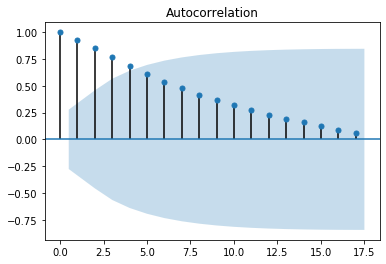

In [106]:
# 检测相关性
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_CA_TETCB['Data']).show()

### 检测平稳性

In [121]:
origin_data=data_CA_TETCB['Data']
statsmodels.tsa.stattools.adfuller(origin_data,maxlag=None)

(-2.9758753244844707,
 0.037209589552179415,
 0,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 1027.7896629399575)

不能很好的拒绝原假设，需要做差分处理，先把所有的指标放到同一个dataframe

In [132]:
data_CA_TETCD=data_CA[data_CA['MSN']=='TETCD']
data_CA_GDPRX=data_CA[data_CA['MSN']=='GDPRX']
data_CA_TPOPP=data_CA[data_CA['MSN']=='TPOPP']

In [153]:
print(len(data_CA_TETCB),len(data_CA_TETCD),len(data_CA_GDPRX),len(data_CA_TPOPP))

50 40 33 50


发现长度不一样，data_CA_GDPRX最迟，1977才开始有的数据，所以考虑从1977再开始

In [170]:
data_CA_TETCB_1977=data_CA_TETCB.loc[95319:,:]
data_CA_TETCD_1977=data_CA_TETCD.loc[95499:,:]
data_CA_TPOPP_1977=data_CA_TPOPP.loc[98011:,:]

In [172]:
data=pd.DataFrame({'TETCB':list(data_CA_TETCB_1977['Data']),
                    'TPOPP':list(data_CA_TPOPP_1977['Data']),
                    'GDPRX':list(data_CA_GDPRX['Data']),
                    'TETCD':list(data_CA_TETCD_1977['Data'])
})
data

,TETCB,TPOPP,GDPRX,TETCD
0,6383598.97,22352.40,599975.93,4.26
1,6497610.43,22835.96,641268.37,4.57
2,6757992.28,23256.88,666630.68,5.53
3,6572758.37,23800.80,686706.70,7.71
4,6365322.31,24285.93,709313.00,8.84
5,6100430.35,24820.01,709514.95,9.29
6,6112530.51,25360.03,734901.02,8.84
7,6557050.67,25844.39,793905.50,8.74
8,6624671.52,26441.11,834568.34,8.89
9,6529625.05,27102.24,866143.52,7.74


In [173]:
data_diff1 = data.diff().dropna()
statsmodels.tsa.stattools.adfuller(data_diff1['TETCB'],maxlag=None)

(-3.923322776859844,
 0.001869753650160541,
 0,
 31,
 {'1%': -3.661428725118324,
  '5%': -2.960525341210433,
  '10%': -2.6193188033298647},
 558.1512578953684)

一次差分后数据已经平稳
### VARMAX拟合

In [175]:
#建立对象，dataframe就是前面的data，varLagNum就是你自己定的滞后阶数
varLagNum=1 # 滞后阶数为1

orgMod = sm.tsa.VARMAX(data_diff1,order=(varLagNum,0),trend='c')
#估计：就是模型
fitMod = orgMod.fit(maxiter=1000,disp=False)
# 打印统计结果
print(fitMod.summary())
# 获得模型残差
resid = fitMod.resid
result = {'fitMod':fitMod,'resid':resid}

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\scipy\linalg\_solvers.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.6837e-21): result may not be accurate.
  x = solve(lhs, q.flatten())


                                    Statespace Model Results                                    
Dep. Variable:     ['TETCB', 'TPOPP', 'GDPRX', 'TETCD']   No. Observations:                   32
Model:                                           VAR(1)   Log Likelihood               -1019.495
                                            + intercept   AIC                           2098.990
Date:                                  Mon, 02 Mar 2020   BIC                           2142.962
Time:                                          17:09:50   HQIC                          2113.566
Sample:                                               0                                         
                                                   - 32                                         
Covariance Type:                                    opg                                         
Ljung-Box (Q):          26.62, 18.45, 30.27, 40.74   Jarque-Bera (JB):      0.22, 2.08, 1.08, 12.04
Prob(Q):                   

记录结果AIC：2098.990，BIC：2142.962

In [177]:
#建立对象，dataframe就是前面的data，varLagNum就是你自己定的滞后阶数
varLagNum=2 # 滞后阶数为1

orgMod = sm.tsa.VARMAX(data_diff1,order=(varLagNum,0),trend='c')
#估计：就是模型
fitMod = orgMod.fit(maxiter=1000,disp=False)
# 打印统计结果
print(fitMod.summary())
# 获得模型残差
resid = fitMod.resid
result = {'fitMod':fitMod,'resid':resid}

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\scipy\linalg\_solvers.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.27439e-21): result may not be accurate.
  x = solve(lhs, q.flatten())


                                    Statespace Model Results                                    
Dep. Variable:     ['TETCB', 'TPOPP', 'GDPRX', 'TETCD']   No. Observations:                   32
Model:                                           VAR(2)   Log Likelihood               -1010.055
                                            + intercept   AIC                           2112.111
Date:                                  Mon, 02 Mar 2020   BIC                           2179.534
Time:                                          17:15:05   HQIC                          2134.460
Sample:                                               0                                         
                                                   - 32                                         
Covariance Type:                                    opg                                         
Ljung-Box (Q):          21.99, 17.51, 44.34, 29.26   Jarque-Bera (JB):      0.29, 0.77, 1.35, 6.26
Prob(Q):                    

E:\anaconda\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


result:AIC：2112.111，BIC：2179.534

In [178]:
#建立对象，dataframe就是前面的data，varLagNum就是你自己定的滞后阶数
varLagNum=3 # 滞后阶数为1

orgMod = sm.tsa.VARMAX(data_diff1,order=(varLagNum,0),trend='c')
#估计：就是模型
fitMod = orgMod.fit(maxiter=1000,disp=False)
# 打印统计结果
print(fitMod.summary())
# 获得模型残差
resid = fitMod.resid
result = {'fitMod':fitMod,'resid':resid}

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                    Statespace Model Results                                    
Dep. Variable:     ['TETCB', 'TPOPP', 'GDPRX', 'TETCD']   No. Observations:                   32
Model:                                           VAR(3)   Log Likelihood               -1000.625
                                            + intercept   AIC                           2125.250
Date:                                  Mon, 02 Mar 2020   BIC                           2216.126
Time:                                          17:16:20   HQIC                          2155.373
Sample:                                               0                                         
                                                   - 32                                         
Covariance Type:                                    opg                                         
Ljung-Box (Q):          25.47, 16.75, 41.44, 31.34   Jarque-Bera (JB):     1.40, 1.62, 0.84, 5.70
Prob(Q):                    0

AIC：2125.250，BIC ：2216.126

可以看出，滞后一阶的时候效果最好（AIC，BIC数值最小），选择一阶。
### 系数平稳检验：CUSUM检验

In [199]:
# 防止选错再跑一遍

varLagNum=1

orgMod = sm.tsa.VARMAX(data_diff1,order=(varLagNum,0),trend='c')
#估计：就是模型
fitMod = orgMod.fit(maxiter=1000,disp=False)
# 打印统计结果
#print(fitMod.summary())
# 获得模型残差
resid = fitMod.resid
#result = {'fitMod':fitMod,'resid':resid}

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\scipy\linalg\_solvers.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.6837e-21): result may not be accurate.
  x = solve(lhs, q.flatten())


In [200]:
# 原假设：无漂移（平稳），备择假设：有漂移（不平稳）
result = statsmodels.stats.diagnostic.breaks_cusumolsresid(resid['TETCB'])
result

(0.34922161116201045, 0.9997098124013446, [(1, 1.63), (5, 1.36), (10, 1.22)])

这里也注意，Python这里不像EVIEWS，python没有办法算AR根，弄不到AR根图，但是python可以进行cusum检验。返回3各变量，第2个是P-value值，记得我之前说的吗，cusum检验要无法拒绝原假设，**也就是说P-value值要大于0.05**，很显然上式成立

### 脉冲响应图

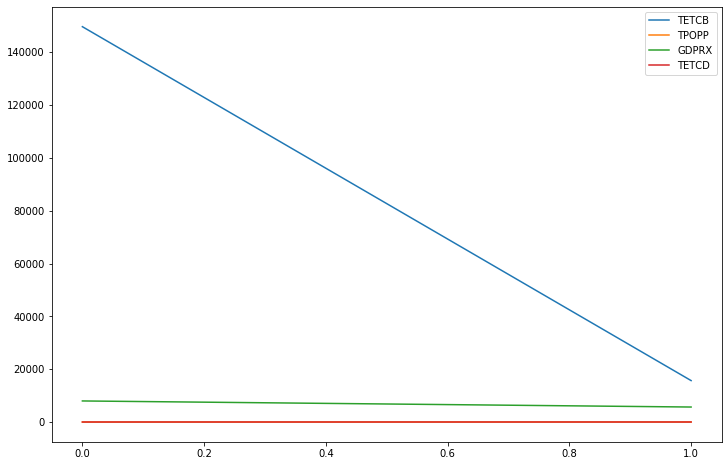

In [201]:
terms=1
ax = fitMod.impulse_responses(terms, orthogonalized=True).plot(figsize=(12, 8))
plt.show()

### 预测

In [208]:
fitMod.forecast()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,TETCB,TPOPP,GDPRX,TETCD
32,458727.26,399.59,74129.98,0.39


In [218]:
# 预测的结果
data.loc[32,:]+fitMod.forecast()

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,TETCB,TPOPP,GDPRX,TETCD
32,8464242.31,37287.20,1811030.98,18.80


# PART II